## Introduction 
----
This notebook contains Exploratory Data Analysis and Predictive Machine Learning Model for fraud detection. Fraud detection is valuable to many industries including the **banking-financial sectors, insurance, law enforcement, government agencies**, and many more. 

In recent years we have seen a huge increase in Fraud attempts, making fraud detection important as well as challenging. Despite countless efforts and human supervision, **hundreds of millions** are lost due to **fraud**. Fraud can happen using various methods ie, stolen credit cards, misleading accounting, phishing emails, etc. Due to small cases in large population detection of fraud is important as well as challenging.

**Data mining** and **machine learning** help to foresee and **rapidly distinguish fraud** and make **quick move** to limit costs. Using data mining tools, a huge number of transactions can be looked to spot pattern and distinguish fraud transactions.

----


**Note: To enable complete interactive demo, please install other requirment.**

"""The code uses several libraries like pandas (for data handling), numpy (for mathematical operations), seaborn and matplotlib (for data visualization), and sklearn (for machine learning)."""

In [37]:
import pandas as pd
import numpy as np 

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is loaded using pandas from a CSV file:

In [40]:
data = pd.read_csv('../input/PS_20174392719_1491204439457_log.csv')

In [41]:
print('Data does not have any NULL value.')
data.isnull().any()

Data does not have any NULL value.


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

The column newbalanceOrig is renamed to newbalanceOrg.
Unnecessary columns (nameOrig, nameDest) are removed.

In [42]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)
data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

The provided data has the financial transaction data as well as the target variable **isFraud**, which is the actual fraud status of the transaction and **isFlaggedFraud** is the indicator which the simulation is used to flag the transaction using some **threshold value**.

In [44]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [45]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
data[[ 'amount','oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

## Data Analysis

----
Since there is **no missing** and **garbage value**, there is no need for data cleaning, but we still need to perform **data analysis** as data contaion huge variation of the value in different columns. Normalization will also imporve the overall accuracy of the machine learning model.

----  A bar chart shows the total amount for differnet transaction type(payment,transfer)
A heatmap is generated to visualize the correlation between features.

The code checks for missing values and finds the minimum and maximum values for key columns (amount, oldbalanceOrg, etc.).

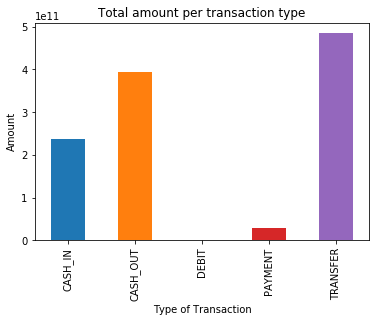

In [46]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [47]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

** The graph above shows that **TRANSFER** and **CASH_OUT** are two most used mode of transaction and we can see that **TRANSFER** and **CASH_OUT** are also the only way in which fraud happen. **Thus we will focus on this type of transactions**

"""A bar chart shows the total amount for different transaction types (PAYMENT, TRANSFER, etc.).
A heatmap is generated to visualize the correlation between features."""

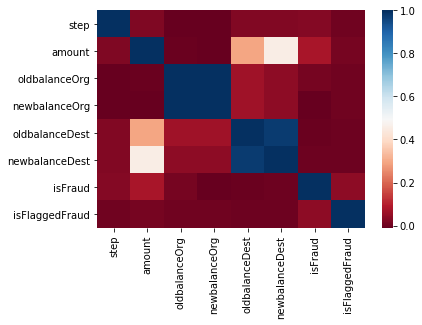

In [48]:
sns.heatmap(data.corr(),cmap='RdBu');

** Things we can conclude from this heatmap: **

* OldbalanceOrg and NewbalanceOrg are highly correlated.
* OldbalanceDest and NewbalanceDest are highly correlated.
* Amount is correlated with isFraud(Target Variable).

There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, **we need to see the heat map of fraud and nonfraud transactions differently**.


The code separates the transactions into fraud and non-fraud cases. It calculates the total number of fraud transactions and the ratio of fraud to non-fraud transactions. It also calculates the total amount lost due to fraud.

""The code separates the transactions into fraud and non-fraud cases. It calculates the total number of fraud transactions and the ratio of fraud to non-fraud transactions. It also calculates the total amount lost due to fraud.""

In [49]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [50]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

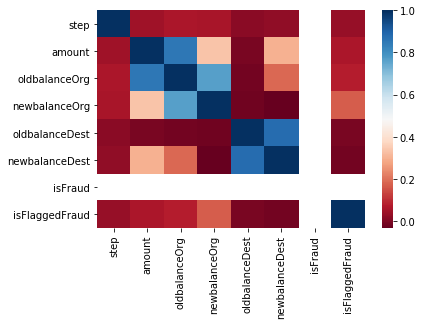

In [51]:
sns.heatmap(fraud.corr(),cmap='RdBu',);

There are 2 flags which stand out to me and it's interesting to look onto: isFraud and isFlaggedFraud column. From the hypothesis, **isFraud** is the indicator which indicates the **actual fraud transactions** whereas **isFlaggedFraud** is what the system prevents the transaction due to **some thresholds** being triggered. From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

"""The dataset is split into training and testing sets using train_test_split.
A RandomForestClassifier model is trained to detect fraud based on transaction data.
The model’s precision is evaluated using the average_precision_score metric."""

The dataset is split into training and testing sets using train_test_split.
A RandomForestClassifier model is trained to detect fraud based on transaction data.
The model’s precision is evaluated using the average_precision_score metric.

In [52]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [53]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [54]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

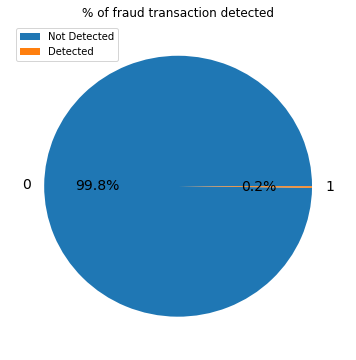

In [55]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

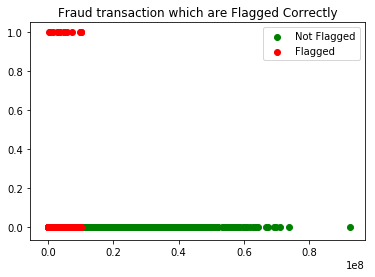

In [56]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

The plot above clearly shows the **need** for a system which can be **fast** and **reliable** to mark the transaction which is fraud. Since, the current system is letting fraud transaction able to **pass through a system** which is **not labeling them as a fraud**. Some data exploration can be helpful to check for the relation between features.

## Data Exploration


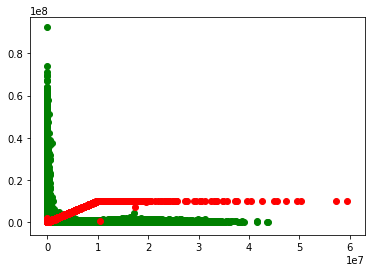

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

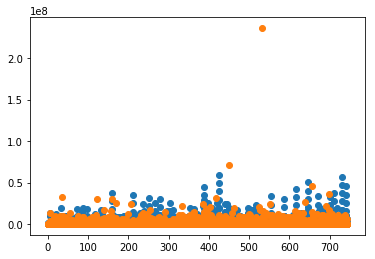

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

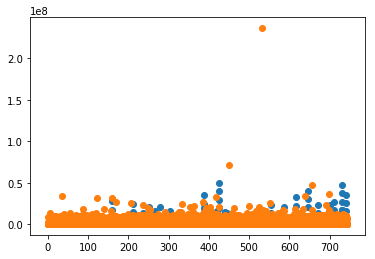

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

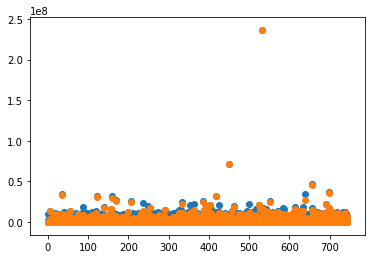

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

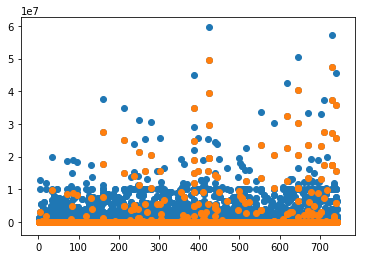

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

## Data Cleaning

In [62]:
import pandas as pd
import numpy as np 
import pickle

In [63]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
data_fraud = pd.read_csv('../input/PS_20174392719_1491204439457_log.csv')

In [65]:
data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [66]:
data_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [67]:
data_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [68]:
X = data_fraud.drop(['isFraud'],axis=1)
y = data_fraud[['isFraud']]

## Machine Learning Model

In [69]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [71]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [72]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(test_y,probabilities))

0.765657410753324


**Average precision score is 0.7687.**

## Conclusion

*  Existing rule-based system is **not capable** of detection of all the fraud transaction.
*  **Machine learning** can be used for the detection of fraud transaction.
*  Predictive models produce **good precision score** and are capable of detection of fraud transaction.